In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [166]:
# Replace the path with the correct path for your data.
safe_driver = pd.read_excel(
    'IT_3.xlsx')

In [167]:
safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null object
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null object
Vehicle_Type                    30240 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null object
EngineHP_bucket                 30240 non-null object
Years_Experience_bucket         30240 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30240 non-null object
State                           3

In [168]:
categorical = safe_driver.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Gender
2
Marital_Status
2
Vehicle_Type
4
Age_bucket
5
EngineHP_bucket
4
Years_Experience_bucket
5
Miles_driven_annually_bucket
3
credit_history_bucket
5
State
50


In [169]:
# Drop other columns with many unique variables
safe_driver.drop(['ID', 'Age_bucket', 'EngineHP_bucket', 'Years_Experience_bucket', \
            'Miles_driven_annually_bucket'], 1, inplace=True)

In [170]:
safe_driver.tail(5)

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehicle_Type,Miles_driven_annually,size_of_family,credit_history_bucket,State
30235,1,F,398,491,6,3,Single,Truck,14509.0,2,Very Poor,VT
30236,0,M,128,745,22,4,Single,Utility,8597.0,6,Very Good,OK
30237,0,M,89,523,4,1,Married,Truck,49747.0,2,Very Poor,NY
30238,1,F,129,703,14,1,Married,Truck,7553.0,1,Good,NJ
30239,1,M,167,830,6,2,Married,Truck,23249.0,3,Exceptional,SD


In [171]:
X = safe_driver.drop('target', 1)
y = safe_driver['target']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [172]:
print(X_test.iloc[0])

EngineHP                             103
credit_history                       737
Years_Experience                      31
annual_claims                          1
size_of_family                         7
Gender_F                               0
Gender_M                               1
Marital_Status_Married                 0
Marital_Status_Single                  1
Vehicle_Type_Car                       0
Vehicle_Type_Truck                     0
Vehicle_Type_Utility                   1
Vehicle_Type_Van                       0
credit_history_bucket_Exceptional      0
credit_history_bucket_Fair             0
credit_history_bucket_Good             1
credit_history_bucket_Very Good        0
credit_history_bucket_Very Poor        0
State_AK                               0
State_AL                               0
State_AR                               0
State_AZ                               0
State_CA                               0
State_CO                               0
State_CT        

In [173]:
#pca.fit(X_train)

#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver='lbfgs')

logisticRegr.fit(X_train, y_train)

X_test = X_test.values
y_test = y_test.values

# Predict for One Observation
predict_lbl = logisticRegr.predict(X_test[0].reshape(1,-1))

print('Prediction with one observation = ', predict_lbl)
# Predict for One Observation
predict_lbl_2 = logisticRegr.predict(X_test)
print('Prediction with multiple observation = ', predict_lbl_2)

logisticRegr.score(X_test, y_test)

Prediction with one observation =  [1]
Prediction with multiple observation =  [1 1 1 ... 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7102204408817635

Text(0, 0.5, 'Predictions')

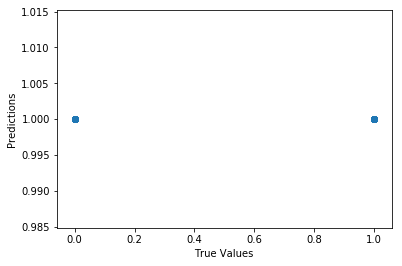

In [175]:
## The line / model
plt.scatter(y_test, predict_lbl_2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [177]:
for values in predict_lbl_2:
    if values == 1:
        print('True')
    else:
        print('False')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
